In [5]:
#Reading Data into Pandas DataFrame
import pandas as pd

df = pd.read_csv('../input/telecom-churn-datasets/churn-bigml-20.csv')

In [6]:
df.info()  # we see that we have 2666 observations and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  667
Columns  :  20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values :   0

Unique values :  
 State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl c

In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## 1.3 Checking the Churn Rate

#### This is a Highly-Imbalanced Dataset,Hence we need to use SMOTE techniques for such a data.

In [10]:
#Separating churn and non churn customers
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

In [11]:
#Dropping Account Length as it doesnt make a sense here
df = df.drop('Account length',axis=1)

In [12]:
#Area Code
df['Area code'].unique()

array([408, 415, 510])

In [13]:
#Replacing Yes/No values with 1 and 0
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

## 1.4 Checking Voice-Mail Feature

In [14]:
#Voice-Mail Feautre Messages
print('Unique vmail messages',df['Number vmail messages'].unique())
df['Number vmail messages'].describe()

Unique vmail messages [ 0 30 33 29 32 27 22 23 41 48 24 34 37 35 21 26 16 20 18 31 14 28 39 36
 45 51 38 11 19 15 25 40 49 17 42 13 46]


count    667.000000
mean       8.407796
std       13.994480
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max       51.000000
Name: Number vmail messages, dtype: float64

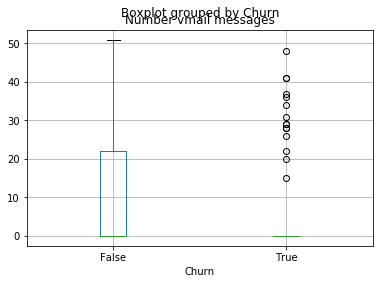

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Number vmail messages', by='Churn')


## 1.5  Total-Minutes in Morning Affecting the Churn Rate

In [16]:
print('Maximum number of minutes:',df['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].max()/60))
print('Maximum number of minutes:',df['Total day minutes'].min())
print('Average number of minutes:',df['Total day minutes'].mean())

Maximum number of minutes: 334.3 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 25.9
Average number of minutes: 180.94812593703156


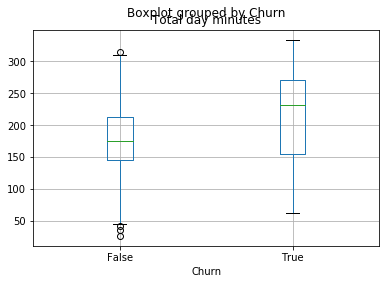

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Total day minutes', by='Churn')


In [18]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 30
Average number of calls: 100.93703148425787


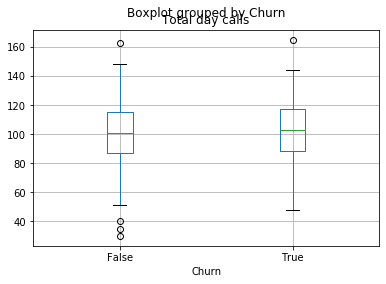

In [19]:

plt.show()
df.boxplot(column='Total day calls', by='Churn')


In [20]:
print('Maximum number of charge:',df['Total day charge'].max())
print('Minimum number of charge:',df['Total day charge'].min())
print('Average number of charge:',df['Total day charge'].mean())

Maximum number of charge: 56.83
Minimum number of charge: 4.4
Average number of charge: 30.761769115442267


Average charge is around 30$ which is  a decent pricing strategy!

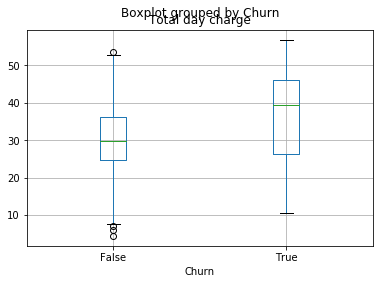

In [21]:
plt.show()
df.boxplot(column='Total day charge', by='Churn')


## 1.5 Evening time Affecting the Churn Rate!!

In [22]:
print('Maximum number of minutes:',df['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total eve minutes'].max()/60))
print('Maximum number of minutes:',df['Total eve minutes'].min())
print('Average number of minutes:',df['Total eve minutes'].mean())

Maximum number of minutes: 361.8 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 48.1
Average number of minutes: 203.35532233883055


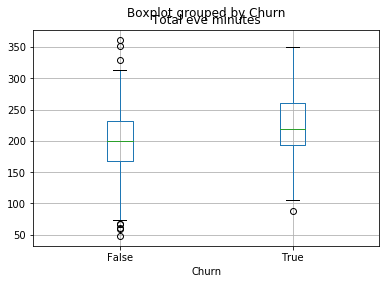

In [23]:
plt.show()
df.boxplot(column='Total eve minutes', by='Churn')


In [24]:
print('Maximum number of calls:',df['Total eve calls'].max())
print('Minimum number of calls:',df['Total eve calls'].min())
print('Average number of calls:',df['Total eve calls'].mean())

Maximum number of calls: 168
Minimum number of calls: 37
Average number of calls: 100.4767616191904


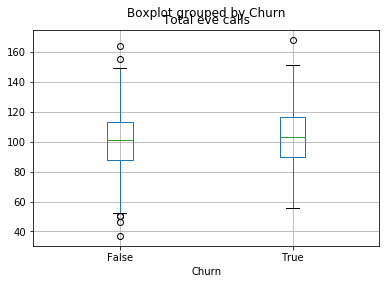

In [25]:

plt.show()
df.boxplot(column='Total eve calls', by='Churn')


In [26]:
print('Maximum number of charge:',df['Total eve charge'].max())
print('Minimum number of charge:',df['Total eve charge'].min())
print('Average number of charge:',df['Total eve charge'].mean())

Maximum number of charge: 30.75
Minimum number of charge: 4.09
Average number of charge: 17.285262368815594


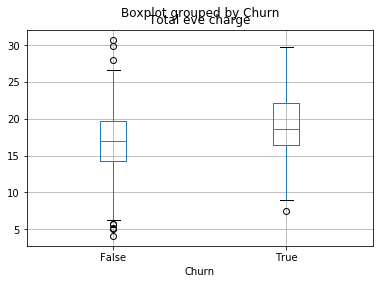

In [27]:
plt.show()
df.boxplot(column='Total eve charge', by='Churn')


## 1.6 Night Time Affecting Churn Rate !!

In [28]:
print('Maximum number of minutes:',df['Total night minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total night minutes'].max()/60))
print('Minimum number of minutes:',df['Total night minutes'].min())
print('Average number of minutes:',df['Total night minutes'].mean())

Maximum number of minutes: 367.7 i.e. Max number of Hours  spent: 6
Minimum number of minutes: 23.2
Average number of minutes: 199.68530734632685


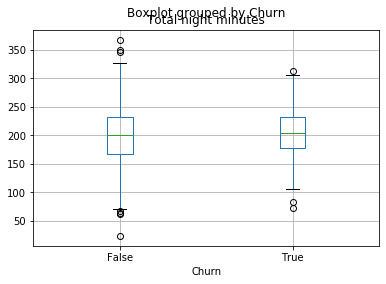

In [29]:
plt.show()
df.boxplot(column='Total night minutes', by='Churn')

#### In Night, The Loyal Customers are spend more time is what the box-plot indicates!

In [30]:
print('Maximum number of calls:',df['Total night calls'].max())
print('Minimum number of calls:',df['Total night calls'].min())
print('Average number of calls:',df['Total night calls'].mean())

Maximum number of calls: 175
Minimum number of calls: 42
Average number of calls: 100.11394302848576


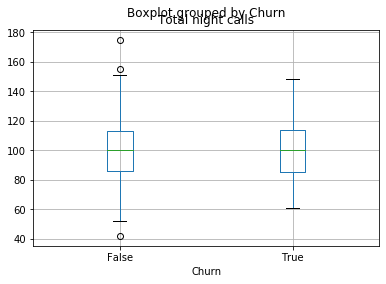

In [31]:
plt.show()
df.boxplot(column='Total night calls', by='Churn')

#### Still Calls are made more by the churned customers!!

In [32]:
print('Maximum number of charge:',df['Total night charge'].max())
print('Minimum number of charge:',df['Total night charge'].min())
print('Average number of charge:',df['Total night charge'].mean())

Maximum number of charge: 16.55
Minimum number of charge: 1.04
Average number of charge: 8.985907046476756


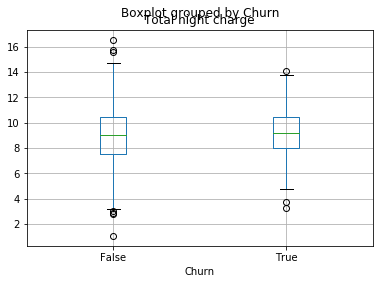

In [33]:
plt.show()
df.boxplot(column='Total night charge', by='Churn')

#### Again Optimization of The Charges would lead to a loyal customer!!!

## 1.7 International Calls Affecting the Churn Rate 

In [34]:
print('Maximum number of minutes:',df['Total intl minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total intl minutes'].max()/60))
print('Minimum number of minutes:',df['Total intl minutes'].min())
print('Average number of minutes:',df['Total intl minutes'].mean())

Maximum number of minutes: 18.3 i.e. Max number of Hours  spent: 0
Minimum number of minutes: 0.0
Average number of minutes: 10.23838080959521


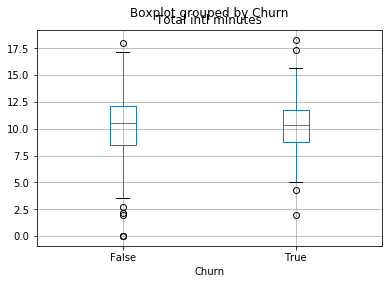

In [35]:
plt.show()
df.boxplot(column='Total intl minutes', by='Churn')


#### Users who make the International Call tend to spend more minutes.

In [36]:
print('Maximum number of calls:',df['Total intl calls'].max())
print('Minimum number of calls:',df['Total intl calls'].min())
print('Average number of calls:',df['Total intl calls'].mean())

Maximum number of calls: 18
Minimum number of calls: 0
Average number of calls: 4.527736131934033


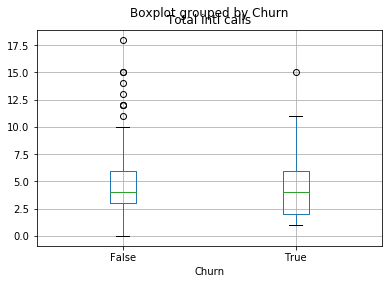

In [37]:
plt.show()
df.boxplot(column='Total intl calls', by='Churn')


#### These Calls clearly indicat that clients without International Plan Suffer and May Leave the Operator.

In [38]:
print('Maximum number of charge:',df['Total intl charge'].max())
print('Minimum number of charge:',df['Total intl charge'].min())
print('Average number of charge:',df['Total intl charge'].mean())

Maximum number of charge: 4.94
Minimum number of charge: 0.0
Average number of charge: 2.7649475262368814


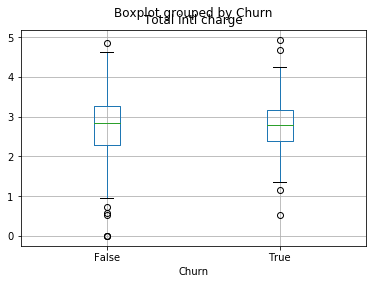

In [39]:
plt.show()
df.boxplot(column='Total intl charge', by='Churn')

### Different Pricing Strategy and International Calling Rate Optimization would lead to lower churn rate

## 1.8 Churn According to States

## Texas,Maryland have the bit more churn rate than usual, A Network Upgradation would be strongly suggested in these areas!.

#### While some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt.
<li><b>A Feedback is neccesary in such situations.
<li><b> It should given a Confirmation to the Customer that there issue would be solved in first attempt

In [42]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})

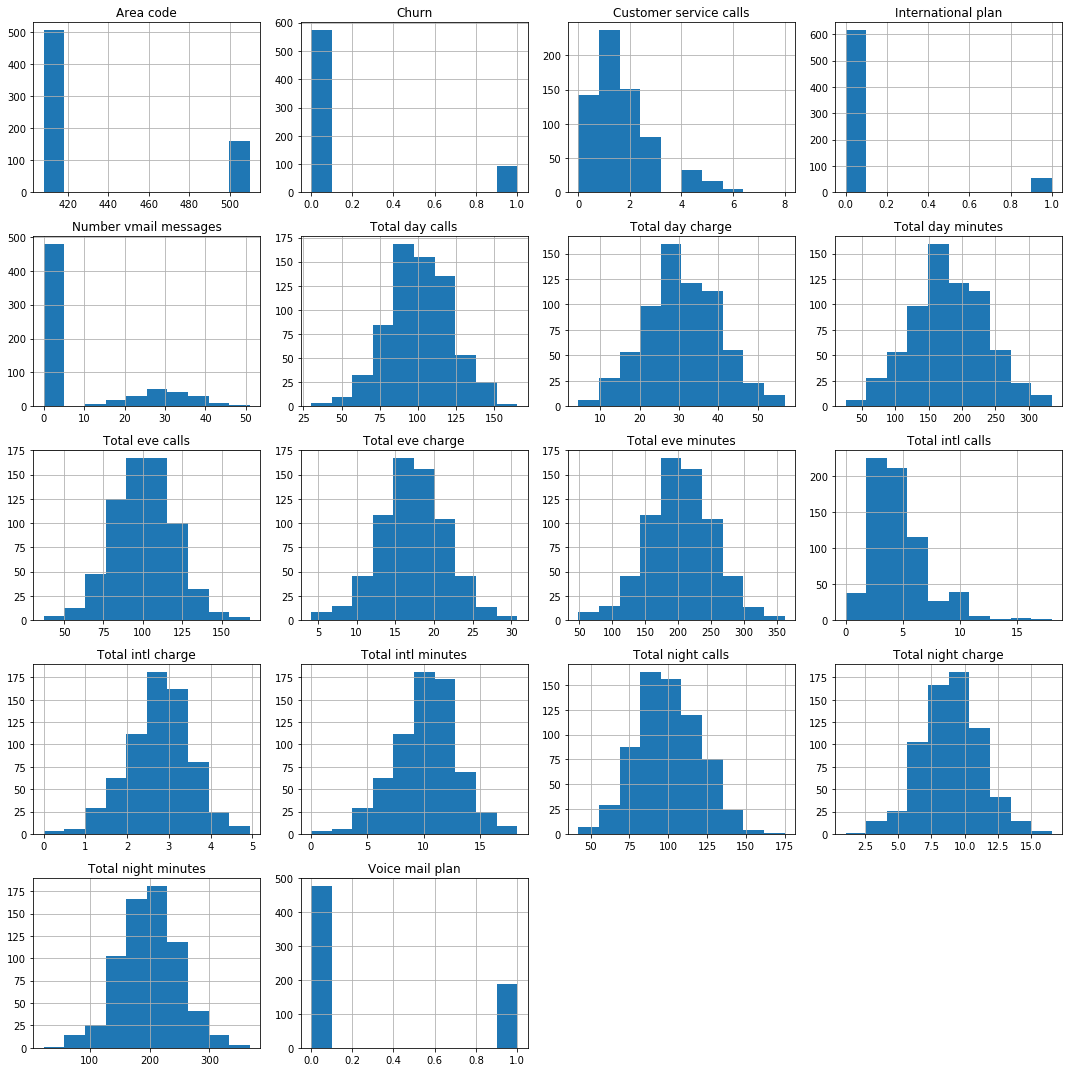

In [43]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

In [44]:
day_df = df[['Total day minutes','Total day calls','Total day minutes','Total day charge','Churn']]
eve_df = df[['Total eve minutes','Total eve calls','Total eve minutes','Total eve charge','Churn']]
night_df = df[['Total night minutes','Total night calls','Total night minutes','Total night charge','Churn']]
intl_df = df[['Total intl minutes','Total intl calls','Total intl minutes','Total intl charge','Churn']]

In [45]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

## 1.8 Data Correlation

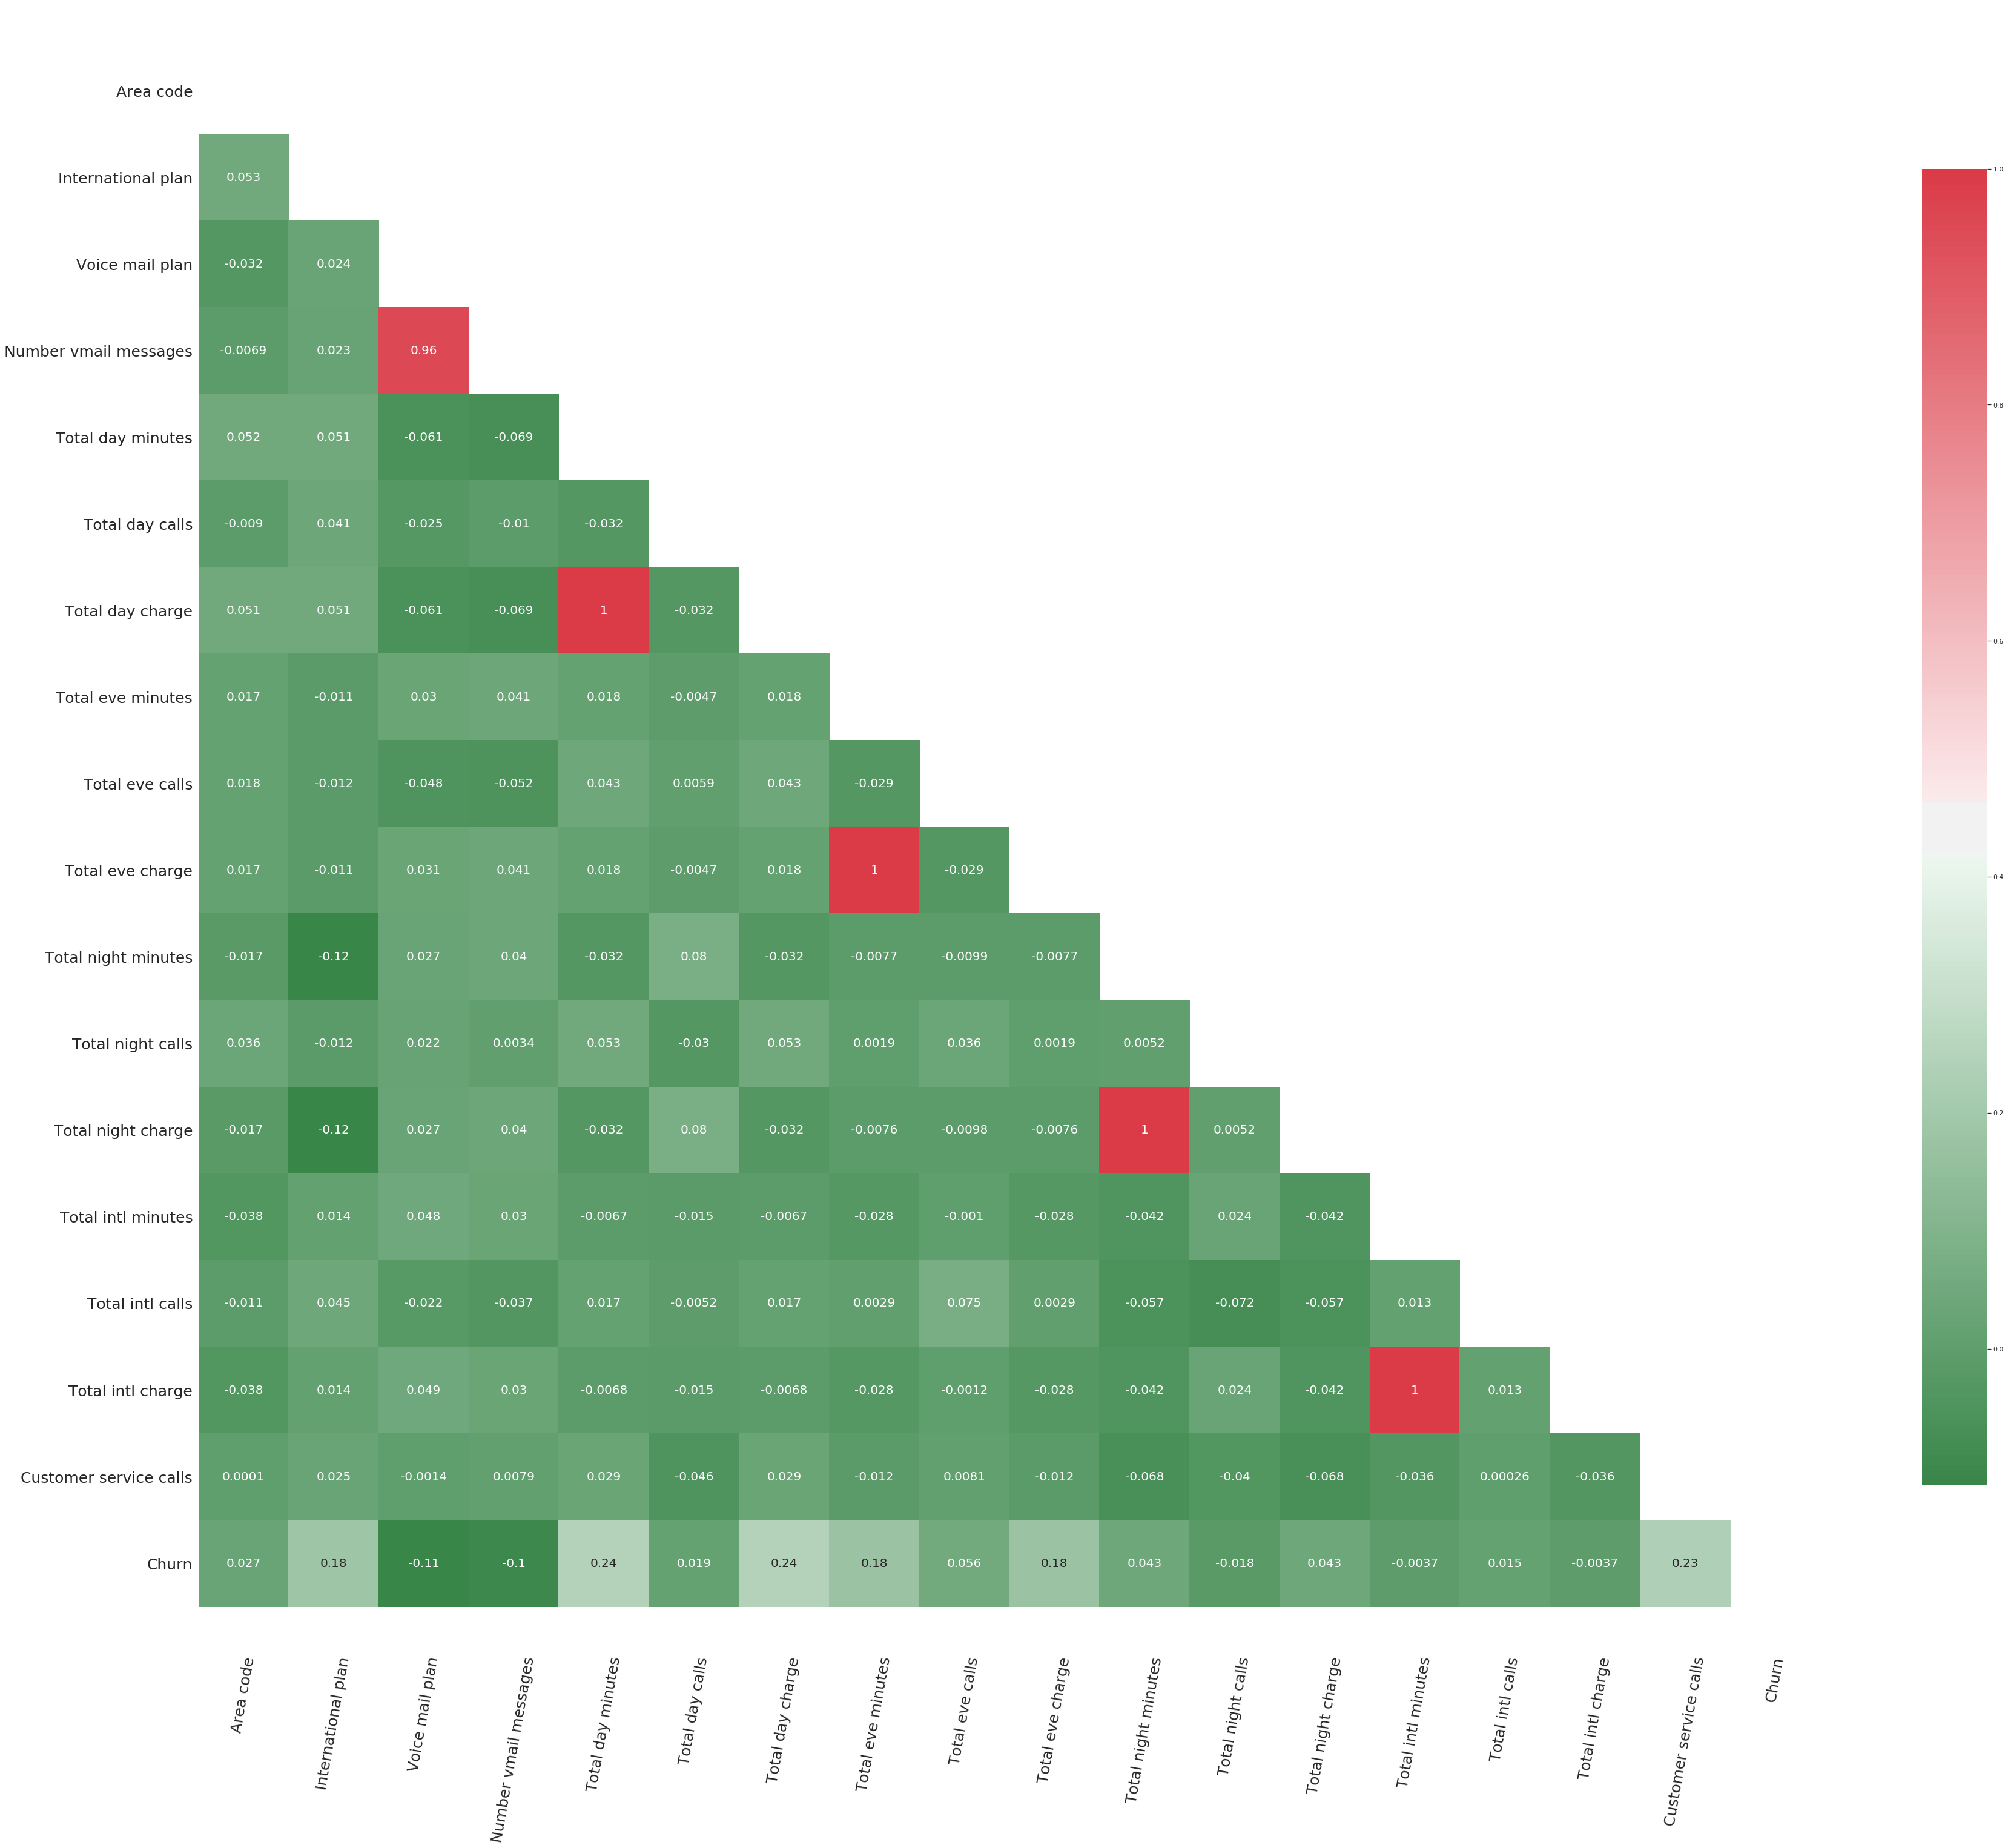

In [46]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);



# Prediction

## 1.9 Training Our Model using Logistic Regression

#### As Dataset is Highly-Imbalance we would like to Over Sample and check results

### SMOTE

Using TensorFlow backend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       149
           1       0.25      0.61      0.35        18

    accuracy                           0.76       167
   macro avg       0.60      0.69      0.60       167
weighted avg       0.87      0.76      0.80       167

Accuracy   Score :  0.7604790419161677
Area under curve :  0.6948173005219985 



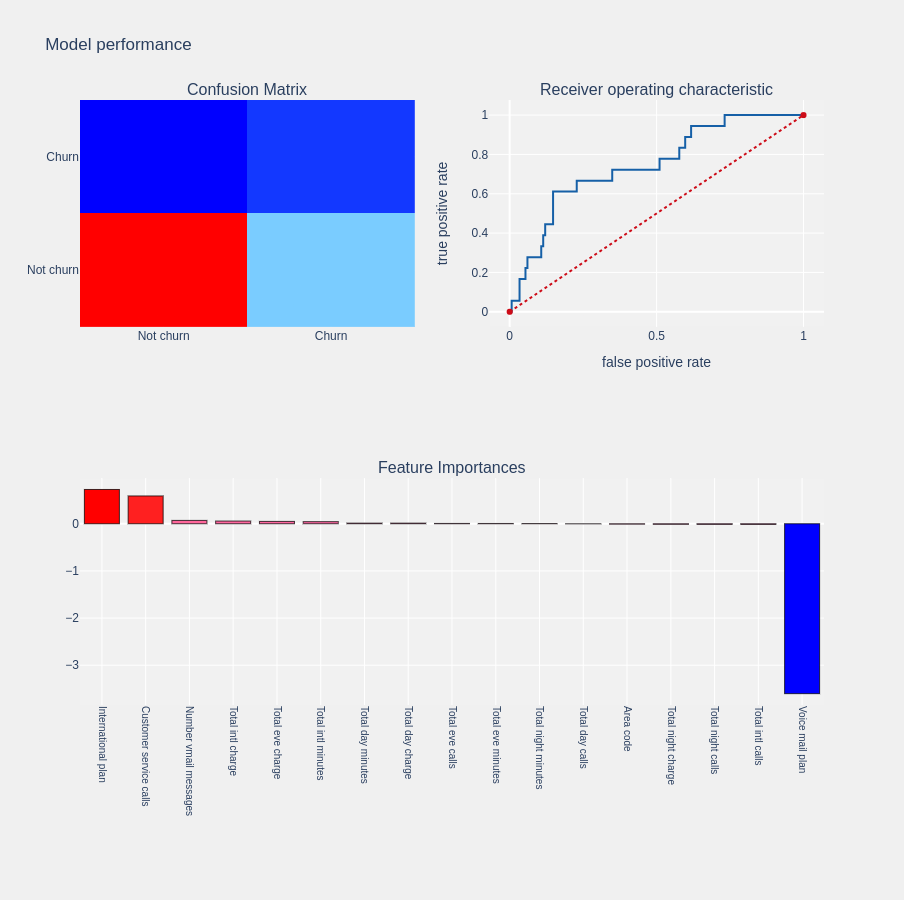

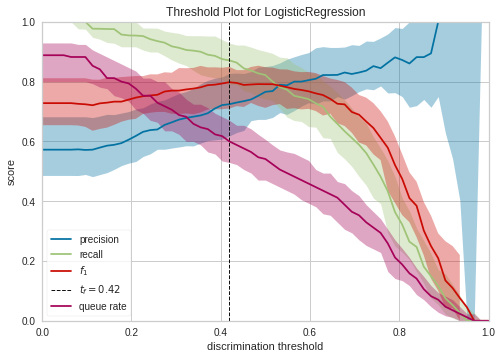

In [48]:
from imblearn.over_sampling import SMOTE


smote_X = df[cols]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

#### Clearly SMOTE over sampling increase the recall which is our main metric to correctly predict the churned customer

### SMOTE and RFE and Logistic Regression

#### Applying SMOTE and Logistic Regression using RFE has good impact and gives us the ranking

## Checking the Scores with other Models and Choosing the Best One!

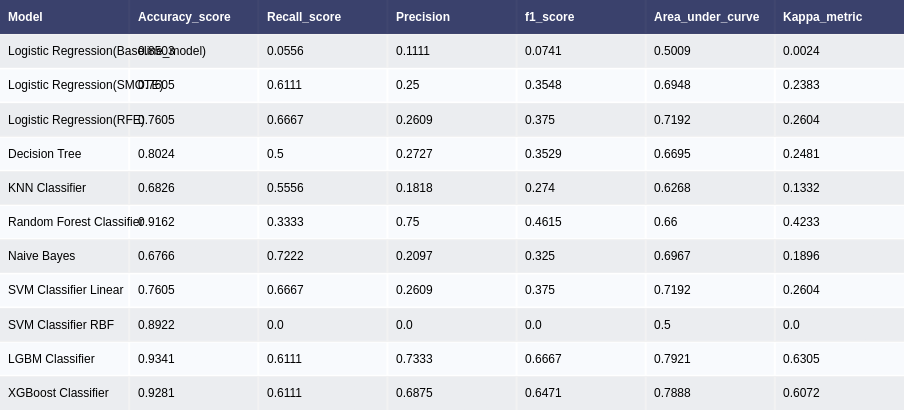

In [50]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

gnb = GaussianNB(priors=None)
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

#### Well no doubt, Boosting and Tree Based Perform Better and XGBoost is the best model to conclude it let's evaluate with other metrics

# 6. Model Performances
## 6.1. model performance metrics</a>

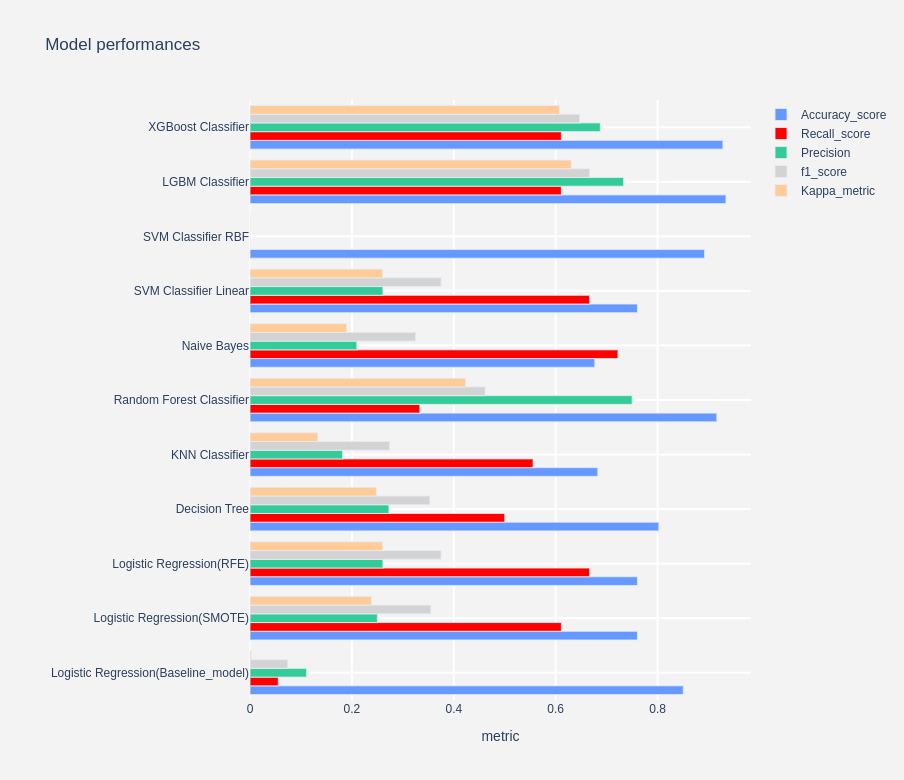

In [51]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### XGBoost is the best 

## Plotting Confusion Matrix of all models

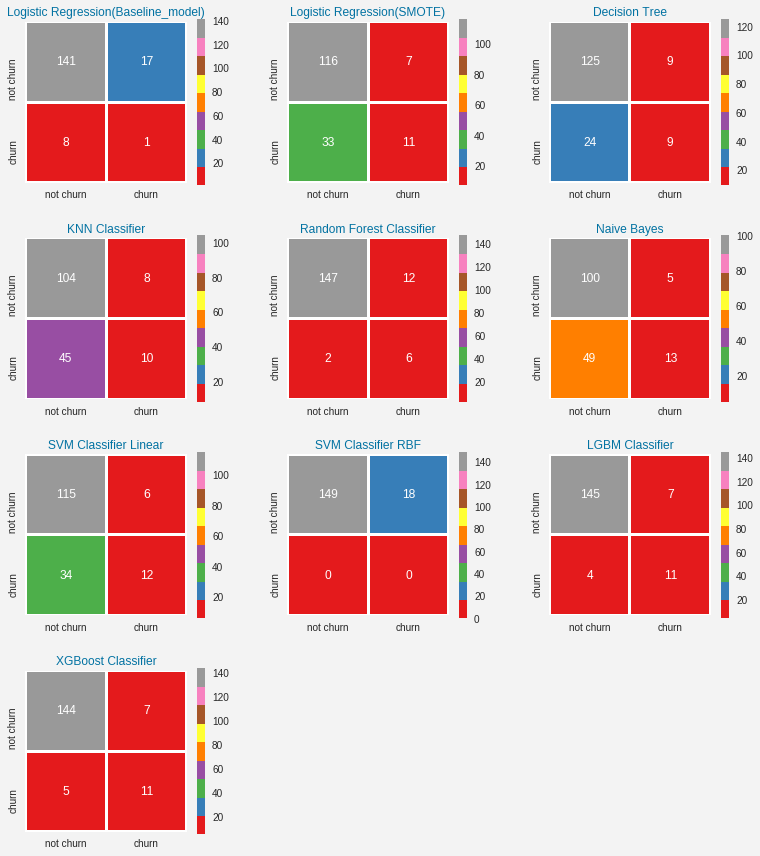

In [53]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

#### Well we want our model to predict churn customers correctly and XGBoost is exceptional to our metric evaluation

## Evaluating ROC Metric

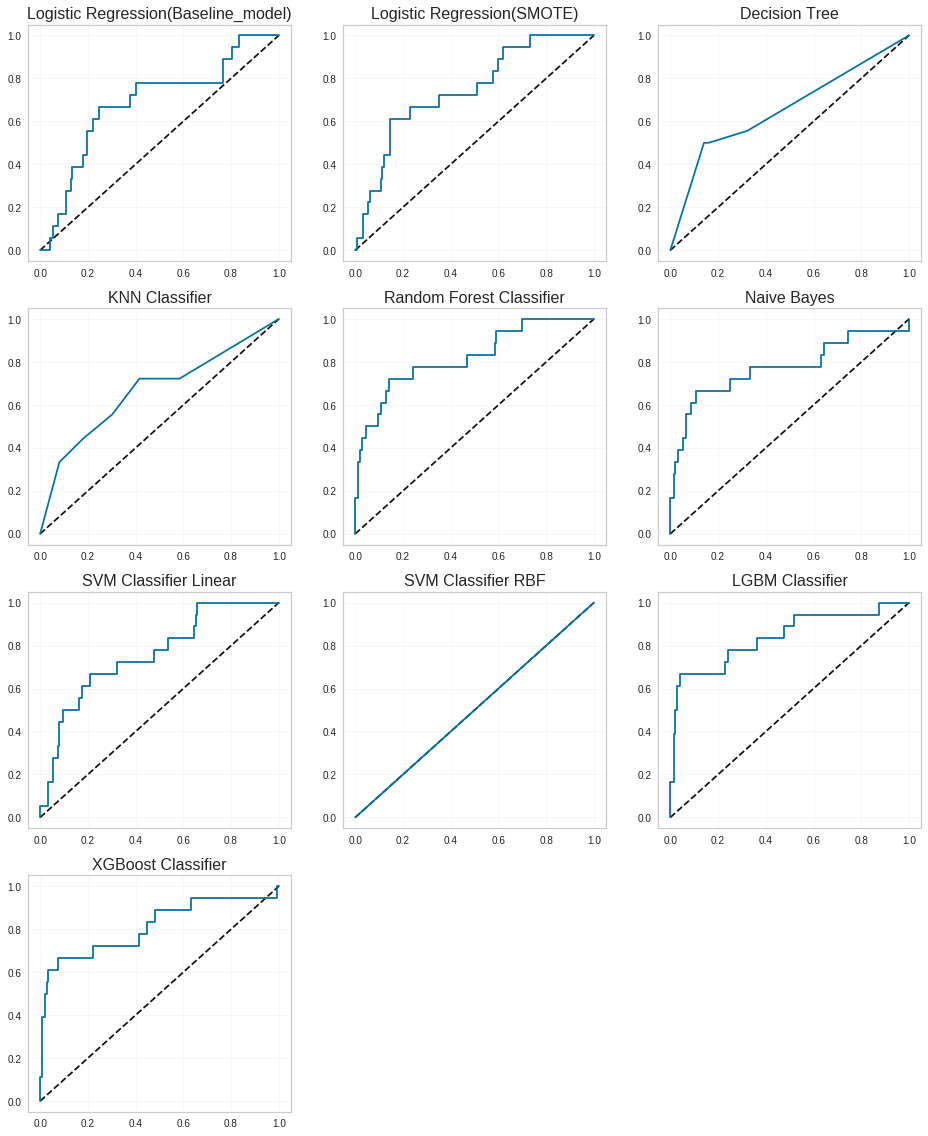

<Figure size 576x396 with 0 Axes>

In [71]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

# plt.style.use("dark_background")
fig = plt.figure(figsize=(16,20))
# fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    
    plt.plot([0,1],[0,1],
             'k--')
    plt.plot(fpr,tpr,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)),color = "b")
   
#     plt.fill_between(fpr,tpr,alpha = .4)
#     plt.fill_between([0,1],[0,1],color = "k")
#     plt.legend(loc = "lower right",
#                prop = {"size" : 12})
#     qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,fontsize=16)
#     plt.xticks(np.arange(0,1,.3))
#     plt.yticks(np.arange(0,1,.3))
    
plt.show()
plt.savefig('hii.png')